In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
import pickle 

In [21]:
pd.set_option("display.max_columns", None)

In [22]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [26]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [24]:
df.head()  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
df.isnull().sum()   

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
categorical_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", "Churn"]
for col in categorical_cols:
    print(f"\nUnique values in '{col}':", df[col].unique())


Unique values in 'gender': ['Female' 'Male']

Unique values in 'SeniorCitizen': [0 1]

Unique values in 'Partner': ['Yes' 'No']

Unique values in 'Dependents': ['No' 'Yes']

Unique values in 'PhoneService': ['No' 'Yes']

Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']

Unique values in 'Churn': ['No' 'Yes']


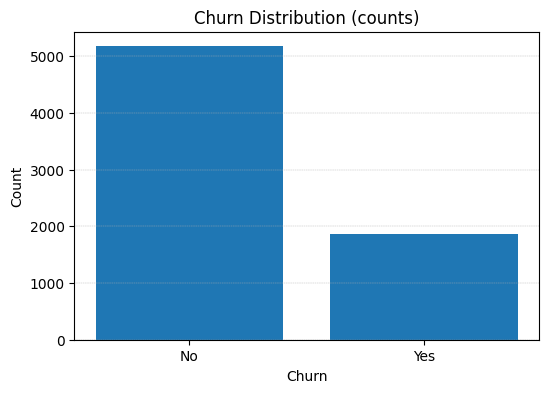

In [32]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(churn_counts.index.astype(str), churn_counts.values)
plt.title('Churn Distribution (counts)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.show()   

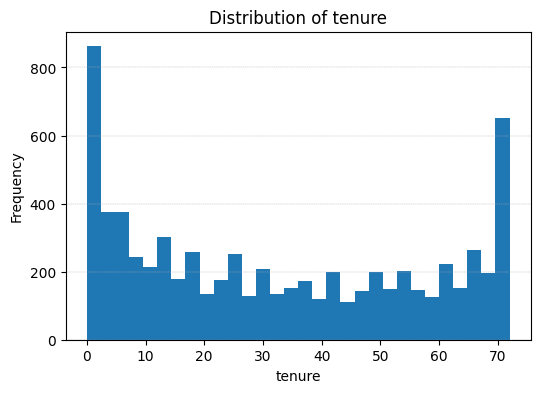

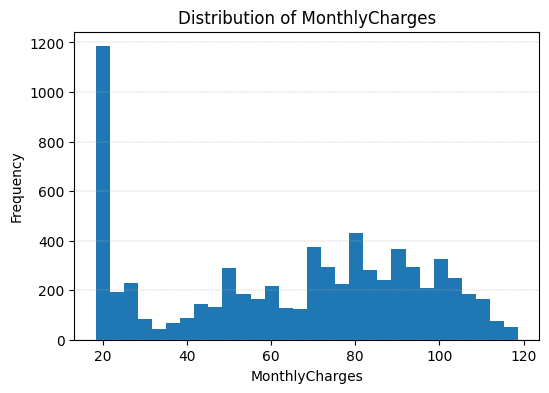

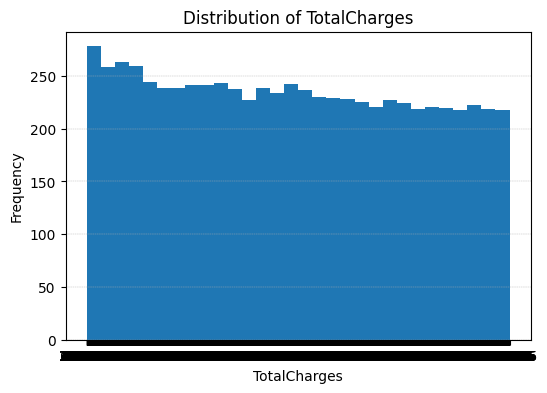

In [34]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', linewidth=0.3)
    plt.show()
    

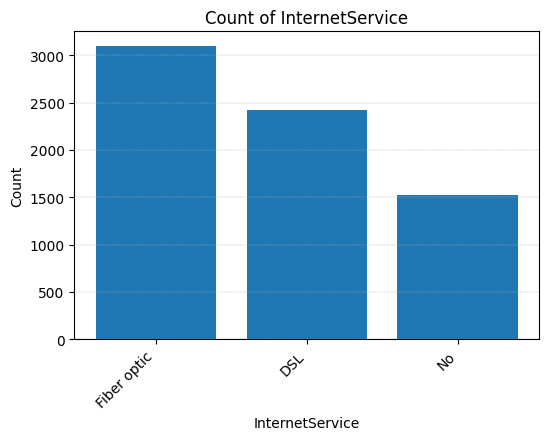

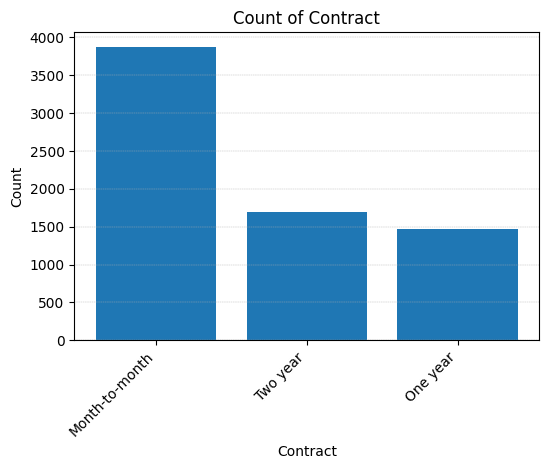

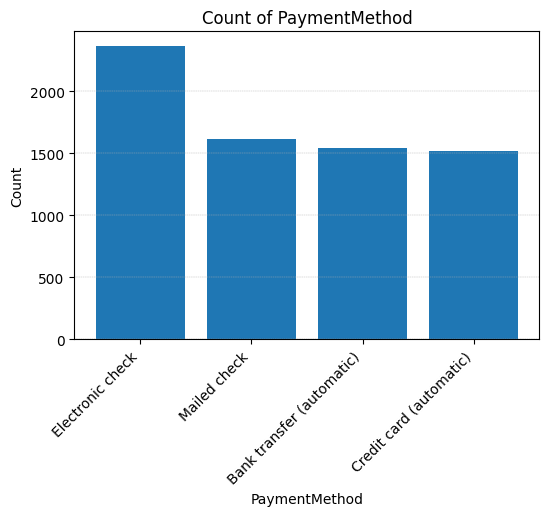

In [36]:
cols_to_plot = ['InternetService', 'Contract', 'PaymentMethod']
for col in cols_to_plot:
    counts = df[col].value_counts()
    plt.figure(figsize=(6,4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', linewidth=0.3)
    plt.show()
    

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()


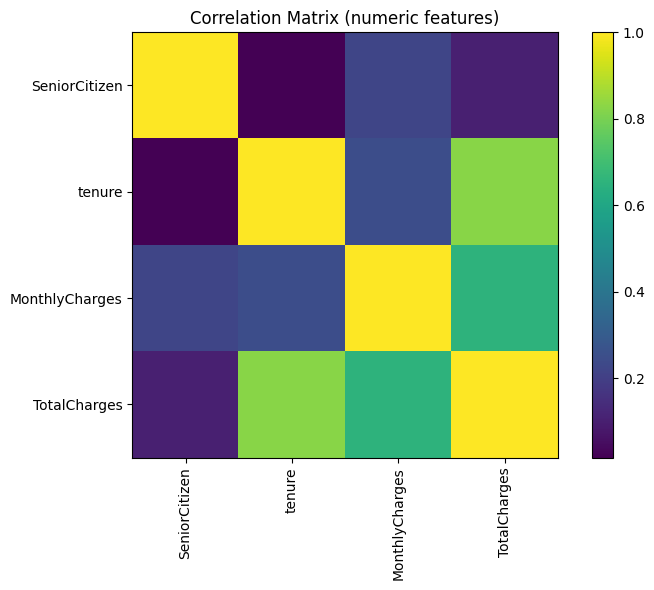

In [44]:
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix (numeric features)')


ticks = range(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=90)
plt.yticks(ticks, corr.columns)
plt.tight_layout()
plt.show()


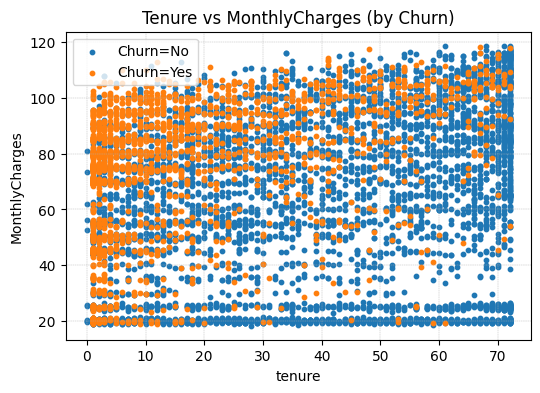

In [45]:
plt.figure(figsize=(6,4))
churn_vals = df['Churn'].astype(str)


for val in churn_vals.unique():
    mask = df['Churn'].astype(str) == val
    plt.scatter(df.loc[mask,'tenure'], df.loc[mask,'MonthlyCharges'], label=f'Churn={val}', s=10)
plt.title('Tenure vs MonthlyCharges (by Churn)')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.3)
plt.show()
    

<Figure size 600x400 with 0 Axes>

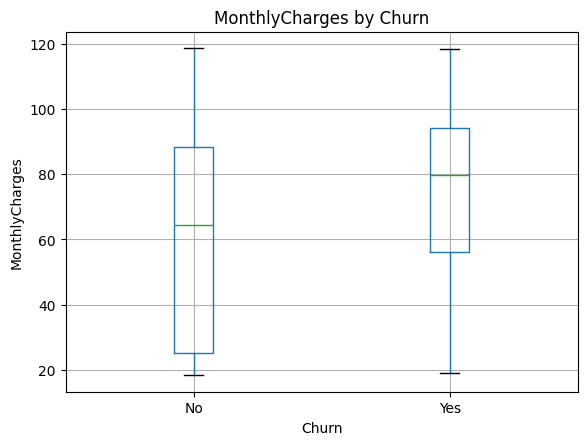

In [46]:
plt.figure(figsize=(6,4))
df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('MonthlyCharges by Churn')
plt.suptitle('')  # remove automatic title
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()
    

In [54]:
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
    

In [55]:
# Ensure TotalCharges is numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [56]:
# Encode all categorical columns (LabelEncoder)
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

In [57]:
print("Data preprocessing completed successfully.")
df.head(3)

Data preprocessing completed successfully.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [58]:

X = df.drop(columns='Churn')
y = df['Churn']

In [59]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [60]:
print("Before SMOTE:", X.shape, "After SMOTE:", X_resampled.shape)


Before SMOTE: (7043, 19) After SMOTE: (10348, 19)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (8278, 19)
Test set size: (2070, 19)


In [64]:

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}
    

In [65]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n {name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Decision Tree Performance:
Accuracy: 0.7966
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1021
           1       0.79      0.81      0.80      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070


 Random Forest Performance:
Accuracy: 0.8580
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


 XGBoost Performance:
Accuracy: 0.8425
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1021
           1       0.84      0.85

In [66]:

best_model = models['Random Forest']
with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    

In [67]:
print(" Model saved as 'customer_churn_model.pkl'")

 Model saved as 'customer_churn_model.pkl'


In [69]:
feature_names = list(X_train.columns)
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)


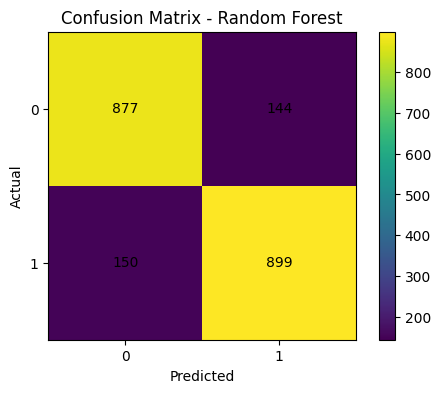

In [70]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1], ['0','1'])
plt.yticks([0,1], ['0','1'])
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, str(z), ha='center', va='center')
plt.show()
    